In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import pydataset
from sklearn.neighbors import KNeighborsClassifier
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import wrangle
import env

In [2]:
df = wrangle.wrangle_zillow()

In [3]:
df.head()

,bedrooms,bathrooms,area,tax_value,yearbuilt,taxamount,fips
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
18,3.0,1.0,1244.0,169471.0,1950.0,2532.88,6037.0
19,3.0,2.0,1300.0,233266.0,1950.0,3110.99,6037.0
20,3.0,2.0,1222.0,290492.0,1951.0,3870.25,6037.0


In [4]:
df.isnull().any()

bedrooms     False
bathrooms    False
area         False
tax_value    False
yearbuilt    False
taxamount    False
fips         False
dtype: bool

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1854411 entries, 6 to 2152863
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   bedrooms   float64
 1   bathrooms  float64
 2   area       float64
 3   tax_value  float64
 4   yearbuilt  object 
 5   taxamount  float64
 6   fips       object 
dtypes: float64(5), object(2)
memory usage: 113.2+ MB


In [6]:
train, validate, test = wrangle.my_train_test_split(df)

train.shape, validate.shape, test.shape

((1038469, 7), (445059, 7), (370883, 7))

In [7]:
X_train, X_validate, X_test = train[['bedrooms', 'bathrooms', 'area', 'tax_value', 'taxamount']], validate[['bedrooms', 'bathrooms', 'area', 'tax_value', 'taxamount']], test[['bedrooms', 'bathrooms', 'area', 'tax_value', 'taxamount']]
y_train, y_validate, y_test = train.fips, validate.fips, test.fips

In [8]:
model = KNeighborsClassifier(n_neighbors=3)

In [9]:
model.fit(X_train, y_train.astype('string'))

KNeighborsClassifier(n_neighbors=3)

In [10]:
model.score(X_validate, y_validate.astype('string'))

0.736789953691533

In [11]:
scaler = sklearn.preprocessing.MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_validate_scaled = scaler.transform(X_validate)
X_test_scaled = scaler.transform(X_test)

Text(0.5, 1.0, 'Scaled')

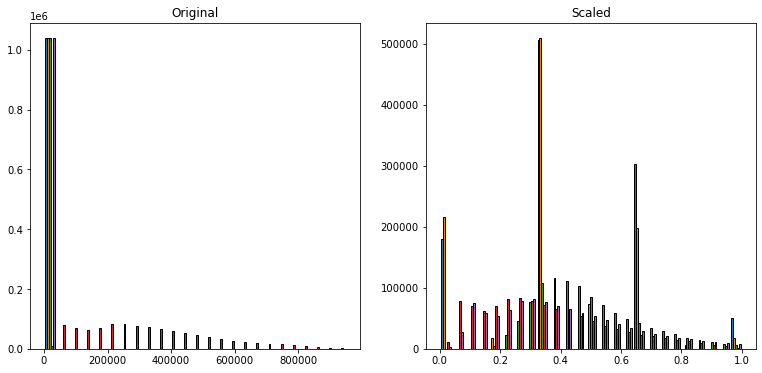

In [12]:
plt.figure(figsize =(13,6))
plt.subplot(121)
plt.hist(X_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_scaled, bins=25, ec='black')
plt.title('Scaled')

In [13]:
model.fit(X_train_scaled, y_train.astype('string'))
model.score(X_validate_scaled, y_validate.astype('string'))

0.793288080906127

In [14]:
scaler = sklearn.preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.inverse_transform(X_train)
X_validate_scaled = scaler.inverse_transform(X_validate)
X_test_scaled = scaler.inverse_transform(X_test)

Text(0.5, 1.0, 'Scaled')

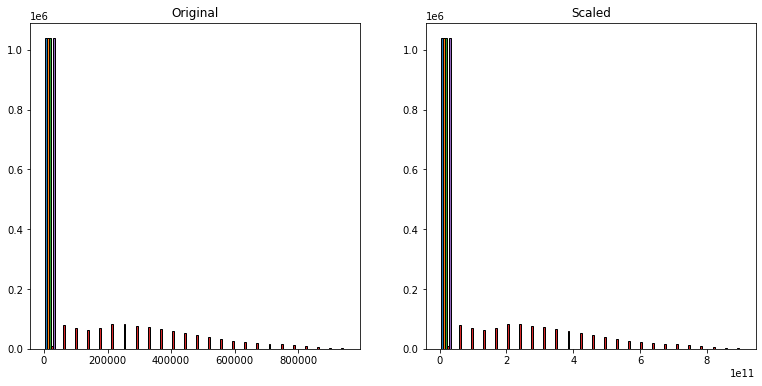

In [15]:
plt.figure(figsize =(13,6))
plt.subplot(121)
plt.hist(X_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_scaled, bins=25, ec='black')
plt.title('Scaled')

The .inverse_transform method resulted in similar y ranges as the original data but still transformed the x_train dataset

In [25]:
scaler = sklearn.preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_validate_scaled = scaler.transform(X_validate)
X_test_scaled = scaler.transform(X_test)

Text(0.5, 1.0, 'Scaled')

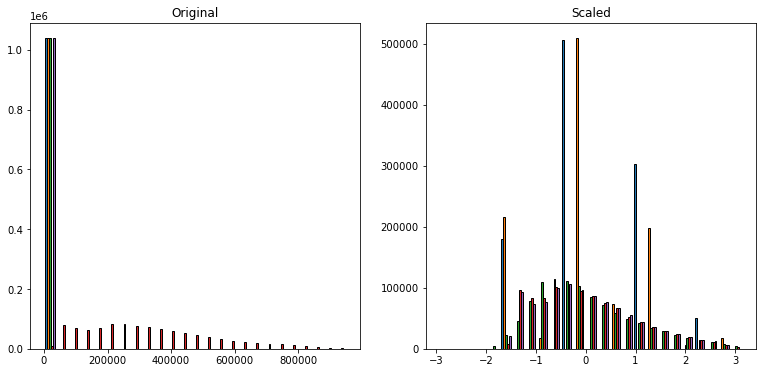

In [26]:
plt.figure(figsize =(13,6))
plt.subplot(121)
plt.hist(X_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_scaled, bins=25, ec='black')
plt.title('Scaled')

In [27]:
model.fit(X_train_scaled, y_train.astype('string'))
model.score(X_validate_scaled, y_validate.astype('string'))

0.792582556470041

In [22]:
scaler = sklearn.preprocessing.RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_validate_scaled = scaler.transform(X_validate)
X_test_scaled = scaler.transform(X_test)

Text(0.5, 1.0, 'Scaled')

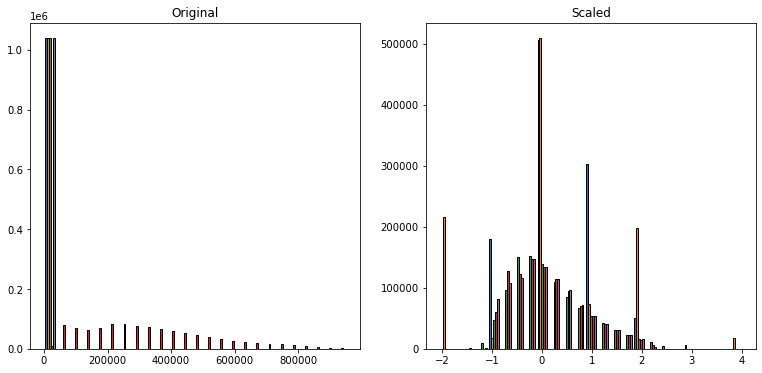

In [23]:
plt.figure(figsize =(13,6))
plt.subplot(121)
plt.hist(X_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_scaled, bins=25, ec='black')
plt.title('Scaled')

In [24]:
model.fit(X_train_scaled, y_train.astype('string'))
model.score(X_validate_scaled, y_validate.astype('string'))

0.7924904338525903

In [28]:
qt = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')
qt.fit(X_train)
X_train_scaled = qt.transform(X_train)
X_validate_scaled = qt.transform(X_validate)
X_test_scaled = qt.transform(X_test)


Text(0.5, 1.0, 'Scaled')

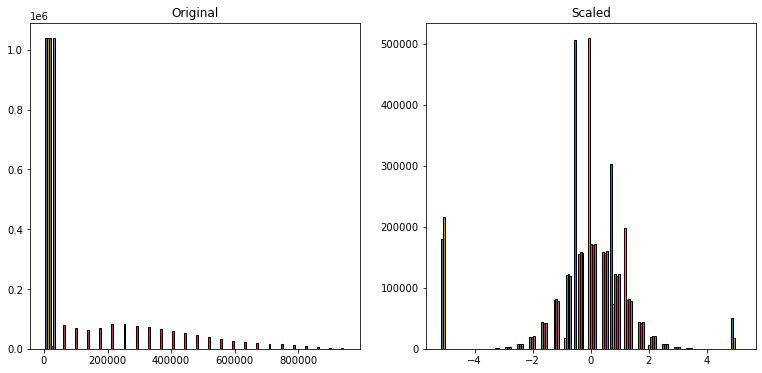

In [29]:
plt.figure(figsize =(13,6))
plt.subplot(121)
plt.hist(X_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_scaled, bins=25, ec='black')
plt.title('Scaled')

In [30]:
model.fit(X_train_scaled, y_train.astype('string'))
model.score(X_validate_scaled, y_validate.astype('string'))

0.7938520510763741

In [31]:
qt = sklearn.preprocessing.QuantileTransformer()
qt.fit(X_train)
X_train_scaled = qt.transform(X_train)
X_validate_scaled = qt.transform(X_validate)
X_test_scaled = qt.transform(X_test)

Text(0.5, 1.0, 'Scaled')

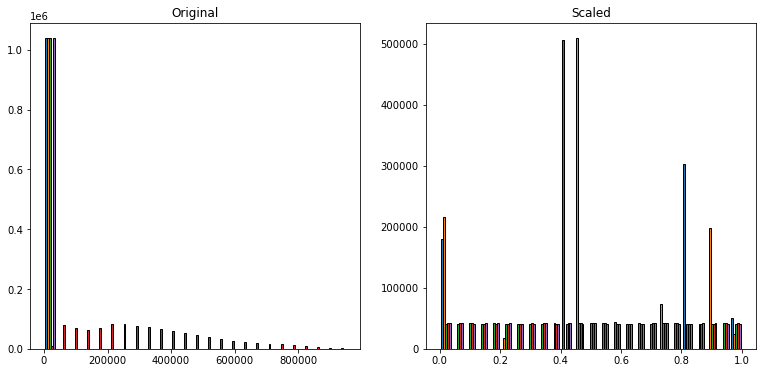

In [32]:
plt.figure(figsize =(13,6))
plt.subplot(121)
plt.hist(X_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_scaled, bins=25, ec='black')
plt.title('Scaled')

In [33]:
model.fit(X_train_scaled, y_train.astype('string'))
model.score(X_validate_scaled, y_validate.astype('string'))

0.7923376451212086